In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
import plotly.express as px

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [122]:
#EDA

In [123]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [124]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [125]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [126]:
df.shape

(3755, 11)

In [127]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [128]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})
df['company_size'] = df['company_size'].replace({'L': 'Large', 'M':'Medium', 'S':'Small'})

In [129]:
df = df.drop(['salary_currency', 'salary'], axis=1)

In [130]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,85847,ES,On-site,ES,Large
1,2023,Mid-level,Contractual,ML Engineer,30000,US,On-site,US,Small
2,2023,Mid-level,Contractual,ML Engineer,25500,US,On-site,US,Small
3,2023,Senior,Full-time,Data Scientist,175000,CA,On-site,CA,Medium
4,2023,Senior,Full-time,Data Scientist,120000,CA,On-site,CA,Medium


In [131]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

(1171, 9)

In [132]:
df = df.drop_duplicates(keep='last')

In [133]:
df.shape

(2584, 9)

In [134]:
#Visualisation

In [135]:
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


In [136]:
bottom_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).tail(10)
bottom_salary.tail(10)

,salary_in_usd
job_title,
Data DevOps Engineer,53654.00
Insight Analyst,46786.00
Machine Learning Research Engineer,42819.25
Principal Data Architect,38154.00
Compliance Data Analyst,30000.00
Autonomous Vehicle Technician,26277.50
3D Computer Vision Researcher,21352.25
Staff Data Analyst,15000.00
Product Data Scientist,8000.00


In [137]:
top_10_jobs=df['job_title'].value_counts().nlargest(10)
print(top_10_jobs)

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
Research Scientist            65
Data Architect                64
Data Science Manager          52
ML Engineer                   34
Research Engineer             33
Name: job_title, dtype: int64


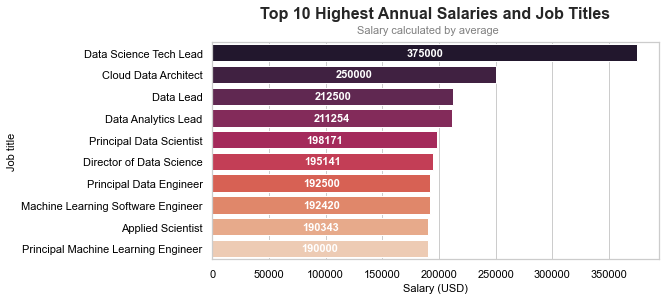

In [138]:
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "rocket",
            )
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 11, color="gray")
plt.xlabel('Salary (USD)', color="black", fontsize=11)
plt.ylabel('Job title', color="black", fontsize=11)
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")

for i in ax.containers:
    ax.bar_label(i, size=11, label_type = "center", color="white", fontweight="bold")

plt.show()

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

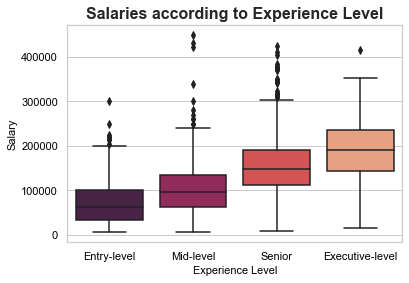

In [139]:
plt.figure(figsize=(6,4))

median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', 
            order=median_salary['experience_level'], 
            palette="rocket")

plt.title("Salaries according to Experience Level", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("Experience Level", color="black", fontsize=11)
plt.ylabel("Salary", color="black", fontsize=11)
plt.xticks(fontsize=11, color="black")
plt.yticks(fontsize=11, color="black")

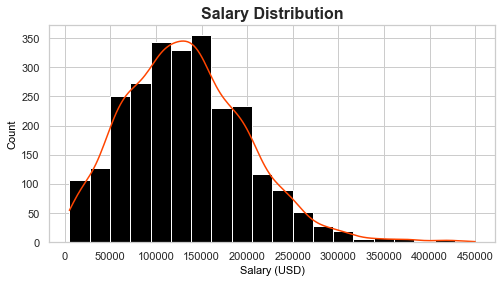

In [140]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=1, color = "black", bins=20,
             kde = True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution", fontsize=16, fontweight = "bold")
plt.xlabel('Salary (USD)', color="black",fontsize=11)
plt.ylabel('Count', color = "black", fontsize=11)
ax.lines[0].set_color('orangered')

In [141]:
job_type = df.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

job_type

,salary_in_usd
employment_type,
Full-time,134435.0
Contractual,113447.0
Freelancer,51808.0
Part-time,39534.0


In [142]:
fig = px.scatter(job_type, x="salary_in_usd", y=None,
                 size="salary_in_usd", color=job_type.index,
                 size_max=60)

fig.update_layout(yaxis=dict(title=''), xaxis=dict(title='Avg. Annual Salary'), title={'text':'Job Type and Average Salary', 'font':{'size':20}})
fig.update_xaxes(range=[5000, 150000], dtick=10000)
fig.update_layout(width=900, height=500)

fig.show()

In [143]:
df_remote = df.groupby('remote_ratio').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

df_remote

,salary_in_usd
remote_ratio,
Remote,143690.0
On-site,131822.0
Hybrid,78487.0


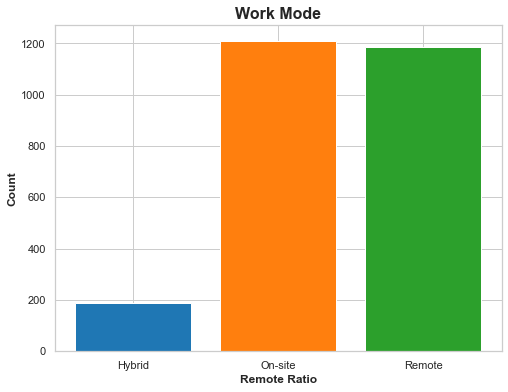

In [144]:
plt.figure(figsize=(8, 6))

values = df.groupby('remote_ratio').size()
labels = values.index

plt.bar(labels, values, color=colors)  
plt.xlabel('Remote Ratio', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Work Mode', fontsize=16, fontweight='bold')

plt.show()

In [145]:
company_size=df['company_size'].value_counts()
print(company_size)

Medium    2028
Large      409
Small      147
Name: company_size, dtype: int64


<Figure size 576x288 with 0 Axes>

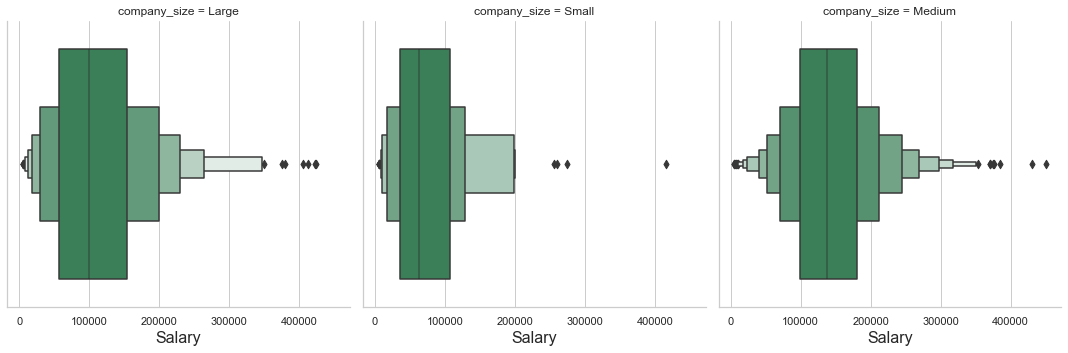

In [146]:
plt.figure(figsize=(8,4))

ax = sns.catplot(data=df, x='salary_in_usd',  col='company_size', kind='boxen', color="seagreen")

ax.set_xlabels("Salary", fontsize =16)
plt.xticks(range(0,500000,100000));

In [147]:
round(df.groupby('company_size').agg({'salary_in_usd':'mean'}),2)

,salary_in_usd
company_size,
Large,113202.24
Medium,141474.51
Small,78364.28


In [148]:
print("Minimum salary: $", df.salary_in_usd.min(),"\nAverage salary: $", round(df.salary_in_usd.mean(),2), "\nMaximum salary: $", df.salary_in_usd.max())

Minimum salary: $ 5132 
Average salary: $ 133409.28 
Maximum salary: $ 450000


In [149]:
#Linear Regression

In [150]:
df_copy = df

df_copy = df_copy.drop(['work_year','employee_residence','remote_ratio'], axis=1)
df_copy.shape

(2584, 6)

In [151]:
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(2555, 6)

In [152]:
categorical_vars = ['experience_level','job_title' ,'company_location','company_size','employment_type']
numeric_vars = ['salary_in_usd']

X = df_copy[categorical_vars]

X.head()

y = df_copy[numeric_vars]
y.head()

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [154]:
df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])

In [155]:
scaler = StandardScaler()
df_copy['salary_in_usd'] = scaler.fit_transform(df_copy[['salary_in_usd']])

In [156]:
cat_cols = df_copy.select_dtypes(include=['object']).columns
num_cols = df_copy.select_dtypes(include=['float64']).columns

categorical_transformer = Pipeline(steps=[("hotencoder", OneHotEncoder(handle_unknown="ignore"))])

In [157]:
df_copy.salary_in_usd.dtype
cat_cols
num_cols

Index(['salary_in_usd'], dtype='object')

In [158]:
preprocessor = ColumnTransformer(transformers=[ ("cat", categorical_transformer, cat_cols) ])

In [159]:
lr = LinearRegression()

In [160]:
lr_train = Pipeline(steps = [("preprocessor", preprocessor),
                                ("lr", lr)])

In [161]:
reg_model = lr_train.fit(X_train,y_train)

In [162]:
print("Intercept: ", reg_model.named_steps['lr'].intercept_)

Intercept:  [49414.59154599]


In [163]:
X_pred = reg_model.predict(X_test)

In [164]:
print("Predicted values: ", X_pred[0:5].round(2))

Predicted values:  [[158008.53]
 [160959.17]
 [159064.46]
 [124645.49]
 [158008.53]]


In [165]:
y_test.salary_in_usd[0:5]

2003    215000
2822    179400
3212    215300
713     130000
2490    236000
Name: salary_in_usd, dtype: int64

In [166]:
from sklearn.metrics import mean_absolute_error, r2_score

mea = mean_absolute_error(y_test,X_pred)
r2_score = r2_score(y_test, X_pred)

print("\n The mean absolute error is: ", mea, "\n The r-squared score is ", r2_score)


 The mean absolute error is:  35427.344087824706 
 The r-squared score is  0.47280813992332205


In [116]:
reg_model.fit(X, y)
linear_regression_step = reg_model.named_steps['lr']
coefficients = linear_regression_step.coef_
print(coefficients)

[[ -34977.05629815   40978.57554114  -17351.41117555   11349.89193291
    -1775.48473411  -20338.18048927   20205.51555386    1908.14967016
   -20290.54801907   95012.11871012  -20050.89188596   14134.38643649
     5948.6891161    15248.16735466    9922.87141061  -17525.35130691
    39132.17330442    8759.66859811    9717.48094228   -7959.19127078
   -24930.638911    -47715.18674169  -14442.42391032    7609.5755095
     5996.85449096  -12200.62899892   20107.96141498  100899.13542964
    19643.63085139    1946.24604053  -76236.23689096   29281.42741809
    -1451.3741158   -23158.36108474    1189.71133361  -12539.01473674
   -70347.31048215   -6234.75073734  -59041.93005773   11391.59265028
    -6740.61313787    5057.96303282   40143.81417531   58458.08299583
   -11654.95702049  -19491.09562992  -35141.92740258  -63479.5206296
   -33666.58741552  -61044.90036581  -17352.79800403  -24837.30579447
    28556.22472194   37355.96076966    7280.53022714   33575.2225179
   -14383.84291149  -54

In [ ]:
#Conclusion: 
#Estimated Salary = (Weight_JobTitle * JobTitle) + (Weight_ExperienceLevel * ExperienceLevel) 
#+ (Weight_EmploymentType * EmploymentType) + (Weight_CompanySize * CompanySize) 
#+ (Weight_CompanyLocation * CompanyLocation)
